In [6]:
import sys
sys.path.append("../")

In [7]:
%load_ext autoreload
%autoreload 2

from src.ksd.ksd import KSD
from src.ksd.kernel import IMQ, RBF, Linear

import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm, trange
import pickle

import high_dim_power as hd

import matplotlib as mpl
mpl.rcParams["mathtext.fontset"] = "cm"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# MMD

In [41]:
tf.random.set_seed(1)

DELTA = 2.

BANDWIDTH_POWER = 0.

STATISTIC = "mmd"

KERNEL = RBF

DIR = "../res/high_dim/gamma"
SUFFIX = f"delta{DELTA}_r{BANDWIDTH_POWER}_{STATISTIC}_{KERNEL.__name__}"

In [42]:
dims = [50]
gammas = [0.1, 1, 5, 7, 10, 20, 40, 50]

ns = [50] * len(dims)

# Load results

In [43]:
res_exact_list = []
stats_res_list = []
for g in gammas:
    if g < 1.:
        # load analytical res
        res = pd.read_csv(
            f"{DIR}/res_analytical_{SUFFIX}_gamma_{g}.csv",
        )
        
        # load empirical results
        stats_res = pickle.load(
            open(f"{DIR}/stats_res_rep_{SUFFIX}_gamma_{g}.p", "rb"),
        )
    
    else:
        # load analytical res
        res = pd.read_csv(
            f"{DIR}/res_analytical_{SUFFIX}_gamma_{g}..csv",
        )
     
        # load empirical results
        stats_res = pickle.load(
            open(f"{DIR}/stats_res_rep_{SUFFIX}_gamma_{g}..p", "rb"),
        )

    res = res.set_index("dim", drop=False)
    res_exact_list.append(res)
    
    stats_res_list.append(stats_res)

# Initialise result classes

In [44]:
def initialize_class(g_ind, gammas, res_exact_list,stats_res_list):
    d = dims[-1]
    g_small = gammas[g_ind]
    print("dim:", d, "gamma:", g_small)
    ts = res_exact_list[g_ind].loc[d, "expectation"] * np.linspace(.25, 1.75, 101)

    lim_res = hd.LimitDistExperimentRepeatedMultiDims(
        empirical_vals_dims_list=stats_res_list[g_ind],
        res_analytical=res_exact_list[g_ind],
        dims=dims,
        ns=ns,
        ts=ts,
    )
    return lim_res

In [49]:
lim_res_list = []
for i, g in enumerate(gammas):
    lim_res = initialize_class(
        g_ind=i, 
        gammas=gammas, 
        res_exact_list=res_exact_list,
        stats_res_list=stats_res_list,
    )
    lim_res_list.append(lim_res)

dim: 50 gamma: 0.1
dim: 50 gamma: 1
dim: 50 gamma: 5
dim: 50 gamma: 7
dim: 50 gamma: 10
dim: 50 gamma: 20
dim: 50 gamma: 40
dim: 50 gamma: 50


## distance

In [52]:
dist_rep_list = []
for i, g in enumerate(gammas):
    dist_rep = lim_res_list[i].compute_distance(size=100000)
    dist_rep["gamma"] = g
    dist_rep_list.append(dist_rep)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.44s/it]


In [57]:
labels = {
    "cond": "Non-degen.", 
    "mm_full": "Degen. Gamma",
#     "mm_chi": "Degen. Chi-square",
}

dist_rep_df = pd.concat(dist_rep_list, ignore_index=True)
dist_rep_df.replace(labels, inplace=True)

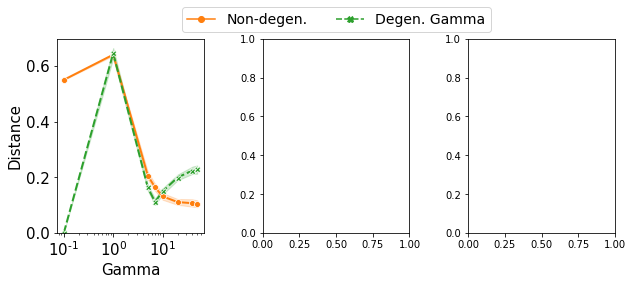

In [60]:
figs, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

colors = ["C1", "C2"]

# fixed n
sns.lineplot(
    ax=axes[0],
    data=dist_rep_df.loc[dist_rep_df.name.isin(labels.values())], 
    x="gamma", 
    y="dist", 
    hue="name",
    style="name",
    linewidth=2,
    markers=True,
    palette=colors,
)

axes[0].set_xlabel("Gamma", fontsize=15)
axes[0].set_ylabel("Distance", fontsize=15)
axes[0].set_ylim(bottom=0.)
axes[0].set_xscale("log")
axes[0].tick_params(labelsize=15)
axes[0].legend([],[], frameon=False)

axes[0].legend(
    fontsize=14, bbox_to_anchor=(3., 1.2), ncol=4, #columnspacing=0.7, handletextpad=0.01
)
# axes[2].legend(
#     fontsize=14, bbox_to_anchor=(1., 1.), #columnspacing=0.7, handletextpad=0.01
# )

plt.subplots_adjust(
    top=.8,
    wspace=0.4,
)
# plt.savefig(f"../figs/high_dim/dist_gamma_{STATISTIC}_{KERNEL.__name__}.pdf", bbox_inches="tight")

# KSD

In [89]:
tf.random.set_seed(1)

DELTA = 2.

BANDWIDTH_POWER = 0.

STATISTIC = "ksd"

KERNEL = RBF

DIR = "../res/high_dim/gamma_ksd"
SUFFIX = f"delta{DELTA}_r{BANDWIDTH_POWER}_{KERNEL.__name__}"

In [91]:
dims = [5]
gammas = [0.01, 0.05, 0.1, 0.5, 1, 5, 10]

ns = [50] * len(dims)

In [92]:
res_exact_list = []
stats_res_list = []
for g in gammas:
    if g < 1.:
        # load analytical res
        res = pd.read_csv(
            f"{DIR}/res_analytical_{SUFFIX}_gammaksd_{g}.csv",
        )
        
        # load empirical results
        stats_res = pickle.load(
            open(f"{DIR}/stats_res_rep_{SUFFIX}_gammaksd_{g}.p", "rb"),
        )
    
    else:
        # load analytical res
        res = pd.read_csv(
            f"{DIR}/res_analytical_{SUFFIX}_gammaksd_{g}..csv",
        )
     
        # load empirical results
        stats_res = pickle.load(
            open(f"{DIR}/stats_res_rep_{SUFFIX}_gammaksd_{g}..p", "rb"),
        )

    res = res.set_index("dim", drop=False)
    res_exact_list.append(res)
    
    stats_res_list.append(stats_res)

# Initialise result classes

In [93]:
lim_res_list = []
for i, g in enumerate(gammas):
    lim_res = initialize_class(
        g_ind=i, 
        gammas=gammas, 
        res_exact_list=res_exact_list,
        stats_res_list=stats_res_list,
    )
    lim_res_list.append(lim_res)

dim: 5 gamma: 0.01
dim: 5 gamma: 0.05
dim: 5 gamma: 0.1
dim: 5 gamma: 0.5
dim: 5 gamma: 1
dim: 5 gamma: 5
dim: 5 gamma: 10


In [94]:
lim_res_list[1].empirical_vals_dims_list

[{5: [-0.00012788974,
   -0.00026795964,
   -9.838293e-06,
   -0.00064489845,
   0.040779103,
   -1.5528023e-05,
   -0.0017241996,
   -0.0009731738,
   -0.0018656648,
   -0.002954575,
   -0.00013050994,
   0.009968228,
   -0.0014242629,
   -0.0006055462,
   -0.0043399595,
   -2.2587787e-05,
   0.010089442,
   -1.4460154e-05,
   -0.00078716624,
   -0.00096636004,
   -0.0017306483,
   -0.002028014,
   -4.759113e-05,
   -0.00087219646,
   -0.00019148507,
   -0.00033716802,
   -0.0010698718,
   -0.00067323993,
   -0.0020347757,
   -0.00038220498,
   -0.0010696322,
   -0.00012018475,
   -0.002492102,
   -0.00024610953,
   -0.00024807182,
   -0.0020783055,
   -1.4126507e-05,
   -0.0020008823,
   0.00015406188,
   -0.0011956026,
   -1.1634536e-06,
   -1.0459282e-05,
   -0.0010836102,
   -0.0029583126,
   -7.0150654e-06,
   -0.0020784235,
   -0.00018420049,
   -0.00010145533,
   -0.00017011815,
   -0.0024140233,
   -2.6859807e-06,
   -4.8328504e-05,
   -1.24678145e-05,
   0.0018107188,
   -0.0

# distance

In [95]:
dist_rep_list = []
for i, g in enumerate(gammas):
    try:
        dist_rep = lim_res_list[i].compute_distance(size=100000)
        dist_rep["gamma"] = g
        dist_rep_list.append(dist_rep)
    
    except:
        pass

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.91s/it]


In [77]:
labels = {
    "cond": "Non-degen.", 
    "mm_full": "Degen. Gamma",
#     "mm_chi": "Degen. Chi-square",
}

dist_rep_df = pd.concat(dist_rep_list, ignore_index=True)
dist_rep_df.replace(labels, inplace=True)

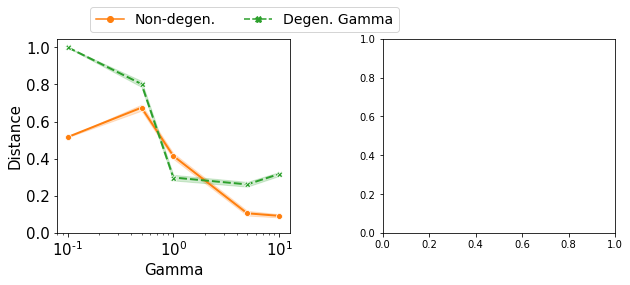

In [80]:
figs, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

colors = ["C1", "C2"]

# fixed n
sns.lineplot(
    ax=axes[0],
    data=dist_rep_df.loc[dist_rep_df.name.isin(labels.values())], 
    x="gamma", 
    y="dist", 
    hue="name",
    style="name",
    linewidth=2,
    markers=True,
    palette=colors,
)

axes[0].set_xlabel("Gamma", fontsize=15)
axes[0].set_ylabel("Distance", fontsize=15)
axes[0].set_ylim(bottom=0.)
axes[0].set_xscale("log")
axes[0].tick_params(labelsize=15)
axes[0].legend([],[], frameon=False)

axes[0].legend(
    fontsize=14, bbox_to_anchor=(1.5, 1.2), ncol=4, #columnspacing=0.7, handletextpad=0.01
)
# axes[2].legend(
#     fontsize=14, bbox_to_anchor=(1., 1.), #columnspacing=0.7, handletextpad=0.01
# )

plt.subplots_adjust(
    top=.8,
    wspace=0.4,
)
# plt.savefig(f"../figs/high_dim/dist_gamma_{STATISTIC}_{KERNEL.__name__}.pdf", bbox_inches="tight")